In [14]:
import pandas as pd
import re
import numpy
import networkx as nx
import csv
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [62]:
data2018 = pd.read_csv(r'C:\Users\Dhruval\Documents\MACSS\2019_Autumn\Network Analysis\NetworkAnalysis_Project\Data\'data2018.csv')

In [63]:
data = data2018

In [64]:
agr_data = data[data['Commodity Code'] == 0]
raw_data = data[data['Commodity Code'] == 2]
man_data = data[data['Commodity Code'] == 6]
enr_data = data[data['Commodity Code'] == 3]

In [102]:
#agr_data.head()
agr_data = agr_data[agr_data['Reporter'] != agr_data['Partner']]
agr_data.loc[agr_data2['Trade Flow'] == 'import', 'Trade Value (US$)'] *= -1
agr_data.head()

,Year,Trade Flow,Reporter,Partner,Commodity Code,Commodity,Trade Value (US$)
1,2018,import,australia,austria,0,Food and live animals,-89272479.0
2,2018,export,australia,austria,0,Food and live animals,227186.0
3,2018,import,australia,belgium,0,Food and live animals,-147974488.0
4,2018,export,australia,belgium,0,Food and live animals,35931549.0
5,2018,import,australia,brazil,0,Food and live animals,-130048188.0


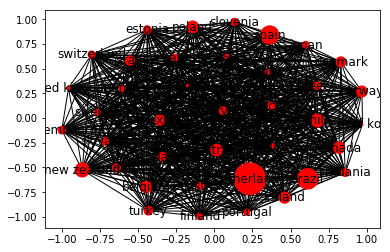

In [134]:
G = nx.Graph()
edges = []
for ind, row in agr_data.iterrows():
    c1 = row['Reporter']
    c2 = row['Partner']
    edges.append((c1,c2))
G.add_edges_from(edges)
nx.draw_networkx(G, node_color='red', node_list=node_size.keys(), node_size=[i for i in node_size.values()])
plt.show()

In [118]:
G=nx.from_pandas_edgelist(net_export, 'Reporter', 'Partner', edge_attr='Trade Value (US$)', create_using=nx.Graph())

In [116]:
G['australia']['austria']['Trade Value (US$)']

-89045293.0

In [37]:
# Calculate eigenvector centrality of matrix G 
# with the exports value as weights
#ec = nx.eigenvector_centrality_numpy(G, weight='Trade Value (US$)')

#nx.set_node_attributes(G, 'cent', ec)r
attr = {}
for name, val in ec.items():
    attr[name] = {'cent': val}
nx.set_node_attributes(G, attr)

# Use this measure to determine the node color in viz
node_color = [float(G.node[v]['cent']) for v in G]

In [49]:
nx.get_node_attributes(G, 'cent')

{'australia': 0.053389841423846646,
 'austria': 0.030561730625917494,
 'belgium': 0.04541667059445023,
 'brazil': 0.050158103455194905,
 'canada': 0.14075635500229774,
 'chile': 0.01772151503993531,
 'china': 0.3908442872786198,
 'czechia': 0.0450715804778884,
 'denmark': 0.018531537978757336,
 'estonia': 0.002904255785517093,
 'finland': 0.010988450118517734,
 'france': 0.10694822518107822,
 'germany': 0.17337621446677487,
 'greece': 0.007675459175577295,
 'hungary': 0.028130351806307928,
 'iceland': 0.0010916535497419763,
 'ireland': 0.013121244067786099,
 'israel': 0.012389351292960185,
 'italy': 0.07390601516328844,
 'japan': 0.1374735381351236,
 'rep. of korea': 0.1189031893577094,
 'latvia': 0.0021177743527309905,
 'lithuania': 0.003911977546007754,
 'luxembourg': 0.004634147952363699,
 'mexico': 0.2168292930176785,
 'netherlands': 0.1298805620184413,
 'new zealand': 0.007271839032302398,
 'norway': 0.01241749322332676,
 'poland': 0.05113445669935661,
 'portugal': 0.0122209413108